In [1]:
import numpy as np
import tarfile
import sys

In [2]:
from sklearn import cluster

In [3]:
#%env
from sklearn.datasets import load_files


In [4]:
sys.executable

'C:\\Users\\Niraj Kumar\\Anaconda3\\python.exe'

In [219]:
import mglearn1

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Working with Text
- Learn about email whether Legitimate or SPAM
- Learn about politician about certain topic (speeches, tweets etc.)
- Customer calling --> Complain or Enquiry

** Text Data different from Numerical data as we have learned before **

## <span style='color:red'>4 types of STRING data</span>
- Categorical data
- Free strings that can be semantically mapped to categories
- Structured String data
- Text Data

## <span style='color:brown'>Representing Text Data as a Bag of Words</span>
- One of the many effective ways to represent TEXT for machine learning (bag-of-the-words) representation
- Bag of words ==> disregarding any structure in a TEXT such as section, paragraph etc..Focus only on words . SO bag of Words

## Computing bag-of-words representation for a corpus (Dataset) of documents , steps :-
- Tokenization (Split document into words)
- Vocabulary Building (Vocabulary of words in any of the documents and number them ..alphabetically)
- Encoding (For each document, count how often each of the words in vocabulary appear)

## Applying bag-of-words to a Toy Dataset

In [7]:
barb_words=['The fool doth think he is wise','but the wise man knows himself to be a fool']

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
vect=CountVectorizer()

In [10]:
vect.fit(barb_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [11]:
print('Vocubalory :{}'.format(vect.vocabulary_))
print('Vocubalory size: {}'.format(len(vect.vocabulary_)))

Vocubalory :{'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}
Vocubalory size: 13


In [12]:
# To create bag of words, we run TRANSFORM
bag_of_words= vect.transform(barb_words)

In [13]:
print('bag of words :\n{}'.format(repr(bag_of_words)))

bag of words :
<2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [14]:
print('Densed representation of the word: \n{}'.format(bag_of_words.toarray()))

Densed representation of the word: 
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [15]:
review_train = load_files('data/aclImdb/train')

In [16]:
text_train,y_train = review_train.data,review_train.target

In [17]:
# Clean the data
text_train=[doc.replace(b'<br />',b' ') for doc in text_train]

In [18]:
review_test = load_files('data/aclImdb/test')

In [19]:
print('Samples per class (training):{}'.format(np.bincount(review_test.target)))

Samples per class (training):[12500 12500]


In [20]:
#Load Test Data 
text_test,y_test=review_test.data,review_test.target
print('no of documents in Test Set :{}'.format(len(text_test)))

no of documents in Test Set :25000


In [21]:
text_test=[doc.replace(b'<br />',b' ') for doc in text_test]

In [22]:
print('Samples per class :{}'.format(np.bincount(y_test)))

Samples per class :[12500 12500]


# <span style='color:red'>Task Statement:-</span>
- Classify comment either in the POSITIVE or NEGATIVE
- Data is not the ML input data format
- ** Convert data in the form of 'bag-of-words' **
- Count how often each word come in a text

# <span style='color:brown'> Apply Bag-of-Words for Movie Reviews</span>

In [23]:
text_train_orig=text_train
y_train_orig=y_train

In [24]:
text_train= [text_train_orig[i] for i in np.where(y_train_orig!=2)[0]]
y_train = [y_train_orig[i] for i in np.where(y_train_orig!=2)[0]]

In [25]:
vect = CountVectorizer().fit(text_train)

In [26]:
X_train = vect.transform(text_train)

In [27]:
print('X_train :\n{}'.format(repr(X_train)))

X_train :
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [28]:
X_train.shape

(25000, 74849)

In [29]:
feature_names=vect.get_feature_names()
print('No of features :{}'.format(len(feature_names)))
print('First 25 features :{}'.format(feature_names[:25]))
print('Features from 25000 for 20 :{}'.format(feature_names[20000:20020]))
print('Features after every 2500 items :{}'.format(feature_names[::2500]))

No of features :74849
First 25 features :['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02', '020410', '029', '03', '04', '041']
Features from 25000 for 20 :['draper', 'draperies', 'drapery', 'drapes', 'draskovic', 'drastic', 'drastically', 'drat', 'dratch', 'dratic', 'dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers']
Features after every 2500 items :['00', 'albert', 'augustine', 'bitten', 'bête', 'cinmea', 'cost', 'dempster', 'draper', 'espouse', 'fleece', 'gillmore', 'hasan', 'idolizes', 'jardine', 'laggard', 'maars', 'meyerling', 'nathaniel', 'outlandish', 'pincher', 'pulpits', 'replica', 'sarducci', 'shunning', 'sprinkling', 'swordmen', 'totalitarism', 'unproven', 'weighting']


## Train the model before feature improvement
- LogisticRegression for such high dimensional data is ideal

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [31]:
scores=cross_val_score(LogisticRegression(),X_train,y_train,cv=5)

In [32]:
print('Mean cross validation score :{:.2f}'.format(np.mean(scores )))

Mean cross validation score :0.88


In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
# C parameters of Logistics Regression 
param_grid={'C':[0.001,0.01,0.1,1,10]}

In [35]:
grid=GridSearchCV(LogisticRegression(),param_grid=param_grid,cv=5)

In [36]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
print('best parameters :{}'.format(grid.best_params_))

best parameters :{'C': 0.1}


In [38]:
print('Best Score :{:.2f}'.format(grid.best_score_))

Best Score :0.89


In [39]:
X_test = vect.transform(text_test)

In [40]:
print('Test score :{:.2f}'.format(grid.score(X_test,y_test)))

Test score :0.88


# <span style='color:red'>Use words those are at least repeating in each document</span>

In [41]:
vect=CountVectorizer(min_df=5).fit(text_train)

In [42]:
X_train=vect.transform(text_train)

In [43]:
print('X_train with min_df: {}'.format(repr(X_train)))

X_train with min_df: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [44]:
feature_names=vect.get_feature_names()

In [45]:
print('Features in top 25 {}'.format(feature_names[:25]))
print('Features in 20000 to 20050 {}'.format(feature_names[20000:20050]))

Features in top 25 ['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s']
Features in 20000 to 20050 ['repartee', 'repay', 'repeat', 'repeated', 'repeatedly', 'repeating', 'repeats', 'repelled', 'repellent', 'repent', 'repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica', 'replicas', 'replicate', 'replied', 'replies', 'reply', 'repo', 'report', 'reported', 'reportedly', 'reporter', 'reporters', 'reporting', 'reports', 'reprehensible', 'represent', 'representation', 'representations', 'representative', 'representatives', 'represented']


In [46]:
grid=GridSearchCV(LogisticRegression(),param_grid=param_grid,cv=5)

In [47]:
grid.fit(X_train,y_train)
print('best cross validation score is :{:.2f}'.format(grid.best_score_))

best cross validation score is :0.89


# <span style:'color:blue'>Use Stop words from SCIKIT LEARN</span>

In [48]:
vect=CountVectorizer(min_df=5,stop_words='english').fit(text_train)

In [49]:
X_train=vect.transform(text_train)

In [50]:
print('X_train with stop words:{}'.format(repr(X_train)))

X_train with stop words:<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [51]:
grid=GridSearchCV(LogisticRegression(),param_grid=param_grid,cv=5)

In [52]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
print('Best crosss validation score with Stop Word :{:.2f}'.format(grid.best_score_))

Best crosss validation score with Stop Word :0.88


# Discarding frequently appearing word , using max_df 

In [54]:
vect=CountVectorizer(min_df=5,max_df=20).fit(text_train)

In [55]:
X_train=vect.transform(text_train)

In [56]:
grid=GridSearchCV(LogisticRegression(),param_grid=param_grid,cv=5)

In [57]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
print('best cross validation score :{:.2f}'.format(grid.best_score_))

best cross validation score :0.69


In [59]:
print('X_train with min and max frequency words as 5 and 20 :{}'.format(repr(X_train)))

X_train with min and max frequency words as 5 and 20 :<25000x15505 sparse matrix of type '<class 'numpy.int64'>'
	with 152480 stored elements in Compressed Sparse Row format>


# <span style='color:green'>Rescaling with TF-IDF </span>
- tfidf(w,d)= tf*log$\frac{N+1}{N_w+1}$+1 (The TF-IDF score of word w in document d)
- Use either TfidfTransformer or TfidfVectorizer

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [61]:
pipe=make_pipeline(TfidfVectorizer(min_df=5,norm=None),LogisticRegression())

In [62]:
param_grid={'logisticregression__C':[0.001,0.01,0.1,1,10]}

In [63]:
grid=GridSearchCV(pipe,param_grid=param_grid,cv=5)

In [64]:
grid.fit(text_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), norm=None, preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
print('best cross validation score :{:.2f}'.format(grid.best_score_))

best cross validation score :0.89


## Which words in tf-idf found most important

In [66]:
# Extract TfidfVectorizer from the pipeline
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']

In [67]:
X_train=vectorizer.transform(text_train)

In [68]:
max_value=X_train.max(axis=0).toarray().ravel()

In [69]:
max_value

array([20.15985557, 34.37105041, 16.70816476, ..., 25.46284132,
       28.0047349 ,  9.33491163])

In [70]:
sorted_by_tfidf=max_value.argsort()

In [71]:
sorted_by_tfidf

array([18279,  6912, 12631, ..., 20518, 24586, 24618], dtype=int64)

In [72]:
# Get Features names
feature_names=np.array(vectorizer.get_feature_names())

In [73]:
print('features with lowest TFIDF are :\n{}'.format(sorted_by_tfidf[:20]))

features with lowest TFIDF are :
[18279  6912 12631 12201 13740 16814  5958  1007 16310 25470  6901  9558
 23174  1865  8080  4884  6923 19540  7403 12263]


In [74]:
print('features with highest TFIDF is :\n{}'.format(sorted_by_tfidf[-20:]))

features with highest TFIDF is :
[ 5435 11658  6844 10918  9983 23984 14641 25915 13142  2177  7296 24346
 26062  3196 26063 13493 27245 20518 24586 24618]


In [75]:
# Get the list of Features that occur Frequently or IDF
sorted_by_idf = np.argsort(vectorizer.idf_)
print('features with lowest TFIDF : \n{}'.format(feature_names[sorted_by_tfidf[:20]]))

features with lowest TFIDF : 
['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'fond'
 'stinker' 'avoided' 'emphasis' 'commented' 'disappoint' 'realizing'
 'downhill' 'inane']


In [76]:
print('feature with highest TFIDF :\n{}'.format(feature_names[sorted_by_tfidf[-30:]]))

feature with highest TFIDF :
['europa' 'angle' 'luzhin' 'ripley' 'cal' 'blob' 'paulie' 'dev'
 'kornbluth' 'roy' 'coop' 'homer' 'dillinger' 'hackenstein' 'gadget'
 'taker' 'macarthur' 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor'
 'bridget' 'victoria' 'khouri' 'zizek' 'rob' 'timon' 'titanic']


# IDF list : words coming in the docs very frequently --> low IDF


In [77]:
sorted_by_idf=np.argsort(vectorizer.idf_)
print('Features with LOWEST IDF :\n{}'.format(feature_names[sorted_by_idf[:20]]))

Features with LOWEST IDF :
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be']


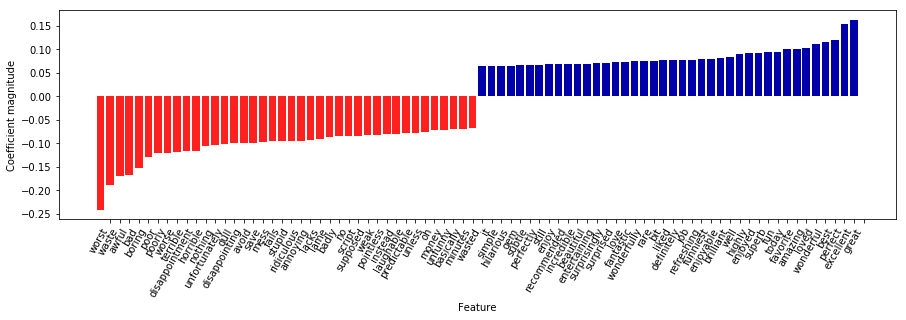

In [78]:
mglearn1.tools.visualize_coefficients(grid.best_estimator_.named_steps['logisticregression'].coef_[0],
                                      feature_names,n_top_features=40)

# Bag-of_words with more tha one word (n-Grams)
- This helps in contextualizaing the sentences
- we can vary from 1 term as 1-gram to n-grams (Its about taking words in sequnces as features)
- Example

In [79]:
# With example/toy dataset
barb_words

['The fool doth think he is wise',
 'but the wise man knows himself to be a fool']

In [80]:
cv=CountVectorizer(ngram_range=(1,1)).fit(barb_words)

In [81]:
print('vocabulary :{}'.format(cv.vocabulary_))
print('Vocabulary size:{}'.format(len(cv.vocabulary_)))

vocabulary :{'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}
Vocabulary size:13


In [82]:
cv=CountVectorizer(ngram_range=(2,2)).fit(barb_words)

In [83]:
print('vocabulary :{}'.format(cv.vocabulary_))
print('Vocabulary size:{}'.format(len(cv.vocabulary_)))

vocabulary :{'the fool': 9, 'fool doth': 3, 'doth think': 2, 'think he': 11, 'he is': 4, 'is wise': 6, 'but the': 1, 'the wise': 10, 'wise man': 13, 'man knows': 8, 'knows himself': 7, 'himself to': 5, 'to be': 12, 'be fool': 0}
Vocabulary size:14


In [84]:
cv.transform(barb_words).toarray()

array([[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]], dtype=int64)

In [85]:
cv=CountVectorizer(ngram_range=(1,3)).fit(barb_words)

In [86]:
print('vocabulary :{}'.format(cv.vocabulary_))
print('Vocabulary size:{}'.format(len(cv.vocabulary_)))


vocabulary :{'the': 25, 'fool': 8, 'doth': 5, 'think': 30, 'he': 11, 'is': 17, 'wise': 36, 'the fool': 26, 'fool doth': 9, 'doth think': 6, 'think he': 31, 'he is': 12, 'is wise': 18, 'the fool doth': 27, 'fool doth think': 10, 'doth think he': 7, 'think he is': 32, 'he is wise': 13, 'but': 2, 'man': 22, 'knows': 19, 'himself': 14, 'to': 33, 'be': 0, 'but the': 3, 'the wise': 28, 'wise man': 37, 'man knows': 23, 'knows himself': 20, 'himself to': 15, 'to be': 34, 'be fool': 1, 'but the wise': 4, 'the wise man': 29, 'wise man knows': 38, 'man knows himself': 24, 'knows himself to': 21, 'himself to be': 16, 'to be fool': 35}
Vocabulary size:39


# <span style='color:brown'>IMDb: Apply n-gram here</span>

In [87]:
pipe=make_pipeline(TfidfVectorizer(min_df=5),LogisticRegression())

In [88]:
param_grid={'logisticregression__C':[0.001,0.01,0.1,1,10,100],'tfidfvectorizer__ngram_range':[(1,1),(1,2),(1,3)]}

In [89]:
grid=GridSearchCV(pipe,param_grid=param_grid,cv=5)

In [90]:
grid.fit(text_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100], 'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [91]:
print('Best Score is :{:.2f}'.format(grid.best_score_))
print('Best Parameters:\n{}'.format(grid.best_params_))

Best Score is :0.91
Best Parameters:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


# <span style='color:red'>Extract scores from Grid Search</span>

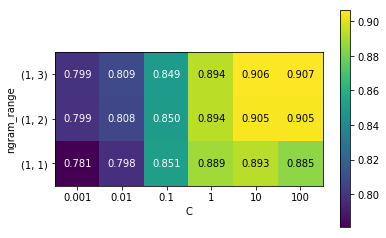

In [92]:
scores=grid.cv_results_['mean_test_score'].reshape(-1,3).T
heatmap=mglearn1.tools.heatmap(scores,xlabel='C',ylabel='ngram_range',cmap='viridis',fmt='%.3f',
                               xticklabels=param_grid['logisticregression__C'],
                               yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

In [93]:
vect=grid.best_estimator_.named_steps['tfidfvectorizer']

In [94]:
feature_names=np.array(vect.get_feature_names())

In [95]:
coef=grid.best_estimator_.named_steps['logisticregression'].coef_

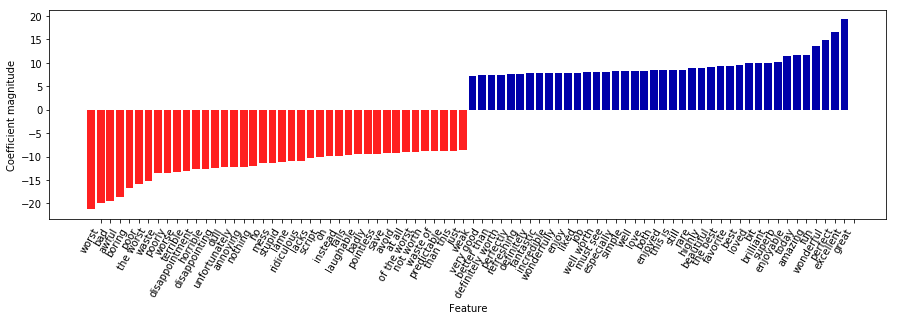

In [96]:
mglearn1.tools.visualize_coefficients(coef[0],feature_names,n_top_features=40)

# Get into the insight of TRIGRAM -  3 gram words

In [97]:
mask=np.array([len(feature.split(' ')) for feature in feature_names])==3

In [98]:
coef_mask=coef.ravel()[mask]

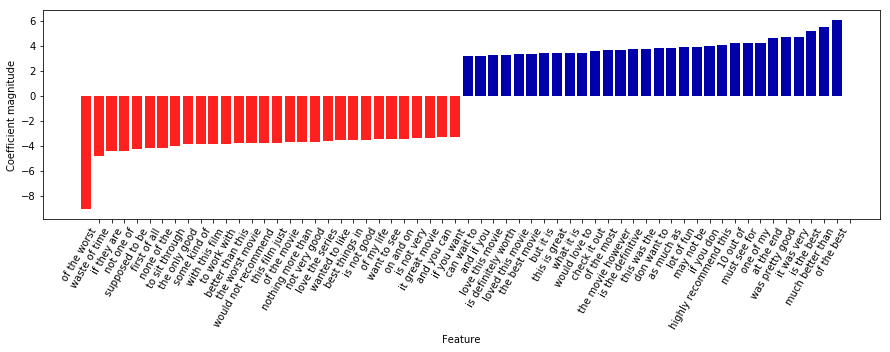

In [99]:
mglearn1.tools.visualize_coefficients(coef_mask,feature_names[mask],n_top_features=30)

# Advance tokenization, Stemming and Lemmatization
- Treating verbed and words starting with same set of letters
- Singular and plural forms of the word may have very little distingusighing character so taking these words differently might incraese the overfitting
- **STEMMING and LEMMATIZATION **
- STEMMING : Words having the same STEM, if identified by RULE BASED HEURISTIC like dropping common suffix
- LEMMATIZATION: If based upon dictionary of know words, factoring role of the wowrds in sentences ==>standardized form of word = LEMMA
- It is NORMALIZATION = STEMMING , LEMMATIZATION, Spelling correction

## Compare STEMMING - PORTER STEMMER (Widely used collection of heuristics) and LEMMATIZATION (from Spacy package)

## https://spacy.io/usage/spacy-101

In [100]:
import spacy
import nltk

In [101]:
import re

In [102]:
#load spacy english language models
en_nlp=spacy.load('en')

#instantiate nltk's porter stemmer
stemmer=nltk.stem.PorterStemmer()

In [106]:
en_nlp.tokenizer.tokens_from_list(['i','am', 'I am neeraj'])

i am I am neeraj 

In [107]:
def compare_normalization(doc):
    # tokenization in spacy
    doc_spacy=en_nlp(doc)
    # print lemma found in spacy
    print('Lemmatization :\n')
    print([token.lemma_ for token in doc_spacy])
    # print tokens found by porter stemmer
    print('\nStemming :\n')
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [108]:
text=u"Our meeting today was worse than yesterday ,I 'm scared of meeting the client yesterday"

In [109]:
compare_normalization(text)

Lemmatization :

['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', '-PRON-', "'", 'm', 'scared', 'of', 'meet', 'the', 'client', 'yesterday']

Stemming :

['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', "'", 'am', 'scare', 'of', 'meet', 'the', 'client', 'yesterday']


- **Stemming : Restricted to trimming the word to a stem**
- **Lemmatization : retrive the correct base verb form**
- Lemmatization : First occurance of meeting is recognized as noun , while the second as verb
- Lemmatization is muc more involved process than stemming while normalization of tokens for ML
- 

-<span style='color:blue'> We want to use regular expression based tokenizer that is used by CountVectorizer and only use the **lemmatization** from spacy. We replace en_nlp.tokenizer with regular expression based tokenization</span>

In [110]:
regexp=re.compile('(?u)\\b\\w\\w+\\b')

In [111]:
old_tokenizer=en_nlp.tokenizer
#replace the tokenizer with regular exp
en_nlp.tokenizer=lambda string:old_tokenizer.tokens_from_list(regexp.findall(string))

In [112]:
def custom_tokenizer(doc):
    doc_spacy = en_nlp(doc)
    return([token.lemma_ for token in doc_spacy])

In [113]:
#define a count vectorizer with custome tokenizer
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer,min_df=5)

In [114]:
# Transform the data and inspect vocabulary size
X_train_lemma=lemma_vect.fit_transform(text_train)

In [119]:
print('features after running through Lemmatization: {}'.format(X_train_lemma.shape))
print('features in the original text :{}'.format(X_train.shape))


features after running through Lemmatization: (25000, 21543)
features in the original text :(25000, 27271)


# We can see feature / attributes have been reduced using lemmatization It can be seen as REGULARIZATION as it conflates certain features.

# Illustration as how Lemmatization can impove the result.
- We wull use StratifiedShuffleSplit for cross validation using only 1% of the data as Training set and rest as TEST set

In [130]:
# Build a grid search using 1% of data as training set
from sklearn.model_selection import StratifiedShuffleSplit

In [131]:
param_grid ={'C':[0.001,0.01,0.1,1,10]}

In [133]:
cv = StratifiedShuffleSplit(n_splits=5,test_size=0.99,train_size=0.01,random_state=0)

In [134]:
grid=GridSearchCV(LogisticRegression(),param_grid=param_grid,cv=cv)

In [135]:
#Grid search with standard CountVectorizer
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.99,
            train_size=0.01),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [136]:
print('Best Cross Validation Score :{:.3f}'.format(grid.best_score_))

Best Cross Validation Score :0.767


In [137]:
# Grid search with Lemmatization
grid.fit(X_train_lemma,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.99,
            train_size=0.01),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [138]:
print('Best Cross Validation Score :{:.3f}'.format(grid.best_score_))

Best Cross Validation Score :0.730


# <span style='color:brown'>Topic Modeling and Document Clustering</span>
- If each document can be categoized to one topic , such as NEWS, Politics etc. then this can be acheived through **CLUSTERING**
- If each document may have 2 -3 topics that can be achieved through DECOMPOSITION (PCA) and each coefficient represent the weightage for that topic documents carries
- Generally people refer to a particular decomposition method for TOPIC Modeling which is Latent Dirichlet Allocation  

## <span style:'color:red'>Latent Dirichlet Allocation</span>
- Groups of words that occur frequently
- In ML , Topic might not be the same as what we normally call in our day today speech
- In ML, Topic resembles more the topic of PCA components or NMF factor

In [142]:
a= np.arange(1,19,1).reshape(3,6)

In [150]:
from sklearn.decomposition import LatentDirichletAllocation

In [151]:
vect = CountVectorizer(max_features=10000,max_df=0.15)

In [152]:
X=vect.fit_transform(text_train)

In [154]:
lda=LatentDirichletAllocation(n_components=10,learning_method='batch',max_iter=25,n_jobs=-1,random_state=0)

In [161]:
document_topics=lda.fit_transform(X)

In [164]:
document_topics.shape

(25000, 10)

In [165]:
lda.components_.shape

(10, 10000)

# Note: Size of components is 
- (n_topics X n_words)
- Each cross section value tells how important is each word for that corresponding topic

## Lets dig into each topic to find out how topics differs with importance of words

In [168]:
sorting=np.argsort(lda.components_,axis=1)[:,::-1]

In [171]:
sorting[:,:3]

array([[ 994, 3383, 9970],
       [9672, 9900, 9465],
       [3764, 1866, 4090],
       [8074, 7924, 3133],
       [2610, 7755,  430],
       [ 230, 2974, 6158],
       [5025,  230,  495],
       [1484, 7582, 4903],
       [7582, 6561, 4903],
       [4407, 4420, 5028]], dtype=int64)

In [185]:
feature_names=np.array(vect.get_feature_names())

In [189]:
feature_names[sorting[0,:10]]

array(['between', 'family', 'young', 'real', 'performance', 'beautiful',
       'both', 'each', 'work', 'us'], dtype='<U17')

In [190]:
mglearn1.tools.print_topics(topics=range(10),feature_names=feature_names,sorting=sorting,topics_per_chunk=5,n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
family        world         comedy        series        saw           
young         us            guy           episode       am            
real          our           re            tv            thought       
performance   american      worst         episodes      watched       
beautiful     documentary   thing         shows         book          
both          history       stupid        season        got           
each          new           laugh         new           now           
work          years         actually      musical       read          
us            own           want          years         10            


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
acti

In [194]:
feature_names[np.argsort(document_topics[0])]

array(['11', '13', '10', '13th', '12', '100', '1000', '000', '101', '00'],
      dtype='<U17')

# <span style='color:red'>Note:-</span>
- We have confined topics to 10 , so each topic needs tobe very broad so that they can together cover the reviews of whole dataset
- We can increase the topic or component range to get specialization of topic
- Lets increase the topic numbers

In [196]:
lda100=LatentDirichletAllocation(n_components=100,learning_method='batch',max_iter=25,random_state=0)

In [197]:
document_topics100=lda100.fit_transform(X)

In [198]:
document_topics100.shape

(25000, 100)

In [199]:
lda100.components_.shape

(100, 10000)

In [210]:
np.array(vect.get_feature_names())[np.argsort(lda100.components_[8])[::-1][:20]]

array(['john', 'silent', 'billy', 'boss', 'candy', 'uncle', 'christopher',
       'chaplin', 'star', 'william', 'davies', 'hollywood', 'stars',
       'slapstick', 'barry', 'walken', 'marion', 'actor', 'part', 'role'],
      dtype='<U17')

# Let's select few topics out of 100 

In [211]:
topics=np.array([7,16,24,25,28,36,37,45,51,53,54,63,89,97])

In [212]:
sorting= np.argsort(lda100.components_,axis=1)[:,::-1]

In [213]:
feature_names=np.array(vect.get_feature_names())

In [215]:
mglearn1.tools.print_topics(topics=topics,feature_names=feature_names,sorting=sorting,topics_per_chunk=7,n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
horror        stupid        new           guy           game          play          war           
mystery       worst         city          gets          team          role          world         
atmosphere    crap          york          house         football      actors        japanese      
murder        want          young         around        sports        cast          german        
house         terrible      midnight      girl          johnny        performance   soldier       
ghost         awful         between       goes          alex          excellent     japan         
thriller      boring        past          car           canadian      performances  american      
director      horrible      both          down          young         actor         ii            
dark      

# Let's deep dive into topic # 53

In [222]:
music_idx=np.argsort(document_topics100[:,53])[::-1]

In [226]:
for i in music_idx[:10]:
    print(b".".join(text_train[i].split(b".")[:2])+b".\n")

b'This movie will always be a Broadway and Movie classic, as long as there are still people who sing, dance, and act..\n'
b'Gene Kelly, Frank Sinatra, Kathryn Grayson, and Jose Iturbi star in "Anchors Aweigh," directed by George Sidney.  Kelly and Sinatra are Joe and Clarence, two navy guys on leave in Hollywood.\n'
b"Such energy and vitality. You just can't go wrong with Busby Berkley films and this certainly must be his best.\n"
b'Two sailors are on leave--ladies man Joseph Brady (Gene Kelly) and shy innocent Clarence Doolittle (Frank Sinatra). They meet beautiful Susan Abbott (Kathryn Grayson) and both fall in love with her.\n'
b'One of the first of the best musicals, Anchors Aweigh features several memorable musical sequences, such as Kelly dancing with Jerry the mouse, Kelly dancing with 7-year-old Sharon McManus, Sinatra singing with Jose Iturbi playing piano, Kathryn Grayson singing with Iturbi conducting, and much more. The Technicolor is perfect, with some innovative camera wo

In [230]:
document_topics100.shape

(25000, 100)

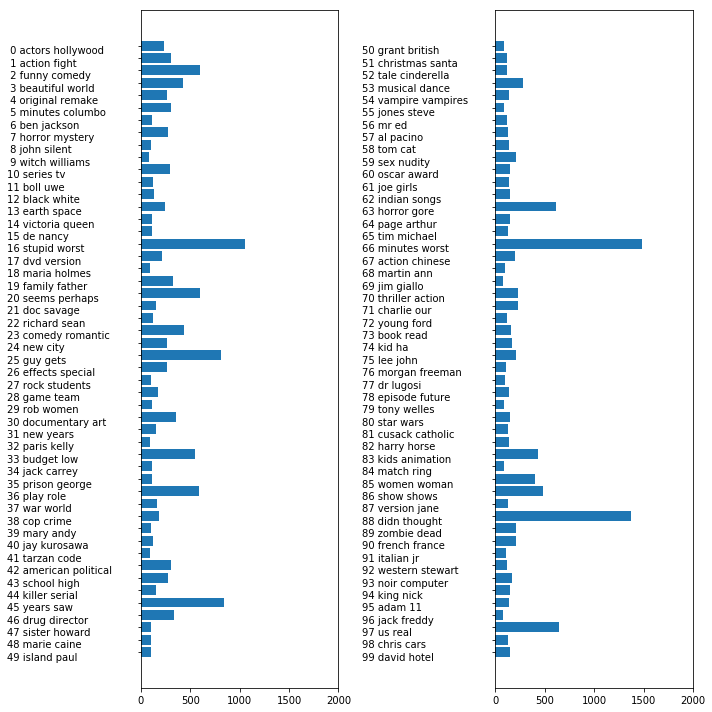

In [247]:
fig,ax = plt.subplots(1,2,figsize=(10,10))
topic_names=['{:>2} '.format(i)+" ".join(words) for i, words in enumerate(feature_names[sorting[:,:2]])]

for col in [0,1]:
    start =col*50
    end = (1+col)*50
    ax[col].barh(np.arange(50),np.sum(document_topics100,axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end],ha='left',va='top')
    ax[col].invert_yaxis()
    ax[col].set_xlim(0,2000)
    yax=ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

In [235]:
topic_names

[' 0actors hollywood',
 ' 1action fight',
 ' 2funny comedy',
 ' 3beautiful world',
 ' 4original remake',
 ' 5minutes columbo',
 ' 6ben jackson',
 ' 7horror mystery',
 ' 8john silent',
 ' 9witch williams',
 '10series tv',
 '11boll uwe',
 '12black white',
 '13earth space',
 '14victoria queen',
 '15de nancy',
 '16stupid worst',
 '17dvd version',
 '18maria holmes',
 '19family father',
 '20seems perhaps',
 '21doc savage',
 '22richard sean',
 '23comedy romantic',
 '24new city',
 '25guy gets',
 '26effects special',
 '27rock students',
 '28game team',
 '29rob women',
 '30documentary art',
 '31new years',
 '32paris kelly',
 '33budget low',
 '34jack carrey',
 '35prison george',
 '36play role',
 '37war world',
 '38cop crime',
 '39mary andy',
 '40jay kurosawa',
 '41tarzan code',
 '42american political',
 '43school high',
 '44killer serial',
 '45years saw',
 '46drug director',
 '47sister howard',
 '48marie caine',
 '49island paul',
 '50grant british',
 '51christmas santa',
 '52tale cinderella',
 '5